In [457]:
%matplotlib inline

# Image Transformations

As discussed in the [data collection](nyc_traffic_data_aggregator.ipynb) section, we captured  

Let's see a sample of the captured images Before we discuss the 
## Image Warping

Before discussing the

In [458]:
from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

from skimage import io
from skimage import transform as tf

from skimage.restoration import denoise_bilateral

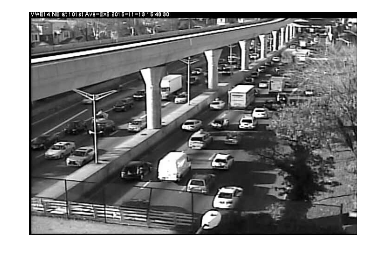

In [459]:
class ImageIO:
    def __init__(self):
        self.image = []
        self.image = np.ndarray(self.image)
        pass

    def load_image(self,filename):
        self.image = io.imread(filename,as_grey =True)

    def save_image(self,filename):
        io.imsave(filename,self.image)

    def plot(self):
        fig, ax1 = plt.subplots()
        ax1.imshow(self.image, cmap=plt.cm.gray)
        ax1.axis('off')
        plt.show()

class ImageTransform(ImageIO):

    def denoise(self,sigma_range=0.05,sigma_spatial=15):
        self.image = denoise_bilateral(self.image
                                       , sigma_range=sigma_range
                                       , sigma_spatial=sigma_spatial)

    def threshold(self,threshold):
        self.image = (self.image < threshold)

    def detect_objects(self):
        return ndimage.label(self.image)

    def warp(self, warp,width=160,height=80):
        src = np.array((
            (width, 0),
            (0, 0),
            (width, height),
            (0, height)
        ))

        tform3 = tf.ProjectiveTransform()
        tform3.estimate(src, warp)
        self.image = tf.warp(self.image, tform3, output_shape=(height, width))


        
image_raw = ImageHelper() 
image_raw.load_image('camera_data/1447536129_cctv589.jpg')
image_raw.save_image('camera_data/test.jpg')
image_raw.load_image('camera_data/1447444257_cctv589.jpg')
image_raw.plot()



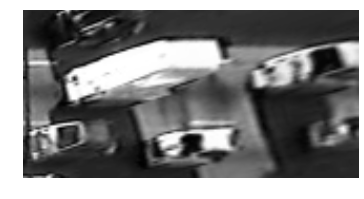

In [460]:
dst = np.array((
    (322, 262),
    (174, 370),
    (486, 275),
    (404, 396)
))

image_raw.warp(dst)
image_raw.plot()


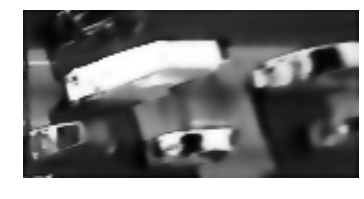

In [456]:
image_raw.denoise(sigma_range=0.2,sigma_spatial=5)
image_raw.plot()

In [438]:
#http://www.frankcleary.com/svdimage/

#U, sigma, V = np.linalg.svd(image_raw.image)
#reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
#plt.imshow(reconstimg, cmap='gray');
#plt.show()

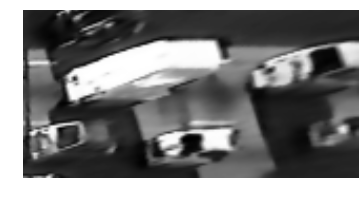

In [439]:
dst = np.array((
    (322, 262),
    (174, 370),
    (486, 275),
    (404, 396)
))

image_raw.warp(dst)
image_raw.plot()


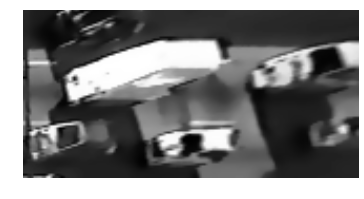

In [361]:
image_raw.denoise()
image_raw.plot()

In [362]:
image_raw.image.mean()

0.3537026378294959

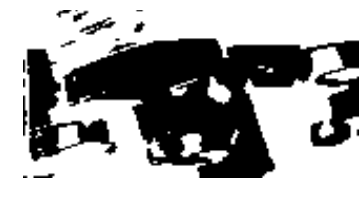

In [363]:
image_raw.threshold(image_raw.image.mean()*0.75)
image_raw.plot()

In [364]:
image_raw.detect_objects()[1]

29

<div class="document" id="basics">
<h1 class="title">Basics</h1>
<p>Several different geometric transformation types are supported: similarity,
affine, projective and polynomial.</p>
<p>Geometric transformations can either be created using the explicit parameters
(e.g. scale, shear, rotation and translation) or the transformation matrix:</p>
<p>First we create a transformation using explicit parameters:</p>
</div>


In [365]:

tform = tf.SimilarityTransform(scale=1, rotation=math.pi / 2,
                               translation=(0, 1))
print(tform.params)



[[  6.12323400e-17  -1.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   6.12323400e-17   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


<div class="document">
<p>Alternatively you can define a transformation by the transformation matrix
itself:</p>
</div>


In [366]:

matrix = tform.params.copy()
matrix[1, 2] = 2
tform2 = tf.SimilarityTransform(matrix)



<div class="document">
<p>These transformation objects can then be used to apply forward and inverse
coordinate transformations between the source and destination coordinate
systems:</p>
</div>


In [367]:

coord = [1, 0]
print(tform2(coord))
print(tform2.inverse(tform(coord)))



[[  6.12323400e-17   3.00000000e+00]]
[[  0.00000000e+00  -6.12323400e-17]]


<div class="document" id="image-warping">
<h1 class="title">Image warping</h1>
<p>Geometric transformations can also be used to warp images:</p>
</div>


(-0.5, 447.5, 171.5, -0.5)

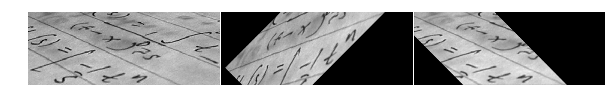

In [368]:

text = data.text()

tform = tf.SimilarityTransform(scale=1, rotation=math.pi / 4,
                               translation=(text.shape[0] / 2, -100))

rotated = tf.warp(text, tform)
back_rotated = tf.warp(rotated, tform.inverse)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 3))
fig.subplots_adjust(**margins)
plt.gray()
ax1.imshow(text)
ax1.axis('off')
ax2.imshow(rotated)
ax2.axis('off')
ax3.imshow(back_rotated)
ax3.axis('off')



<div class="document" id="parameter-estimation">
<h1 class="title">Parameter estimation</h1>
<p>In addition to the basic functionality mentioned above you can also estimate the
parameters of a geometric transformation using the least-squares method.</p>
<p>This can amongst other things be used for image registration or rectification,
where you have a set of control points or homologous/corresponding points in two
images.</p>
<p>Let's assume we want to recognize letters on a photograph which was not taken
from the front but at a certain angle. In the simplest case of a plane paper
surface the letters are projectively distorted. Simple matching algorithms would
not be able to match such symbols. One solution to this problem would be to warp
the image so that the distortion is removed and then apply a matching algorithm:</p>
</div>


(-0.5, 299.5, 49.5, -0.5)

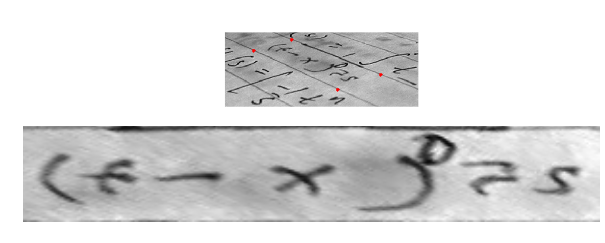

In [369]:

text = data.text()

src = np.array((
    (0, 0),
    (0, 50),
    (300, 50),
    (300, 0)
))
dst = np.array((
    (155, 15),
    (65, 40),
    (260, 130),
    (360, 95)
))

tform3 = tf.ProjectiveTransform()
tform3.estimate(src, dst)
warped = tf.warp(text, tform3, output_shape=(50, 300))

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 3))
fig.subplots_adjust(**margins)
plt.gray()
ax1.imshow(text)
ax1.plot(dst[:, 0], dst[:, 1], '.r')
ax1.axis('off')
ax2.imshow(warped)
ax2.axis('off')



<div class="document">
</div>


In [370]:

plt.show()
